<a href="https://colab.research.google.com/github/Sonali504/Handwritten-Digit-Recognition-MNIST-/blob/main/Handwritten_Digit_Recognition_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Step 2: Load MNIST Dataset

print('Loading MNIST dataset...')
mnist=fetch_openml('mnist_784', version=1, as_frame=False)

Loading MNIST dataset...


In [3]:
x,y= mnist['data'], mnist['target']
y= y.astype(np.int8)

In [4]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (70000, 784)
Shape of Y:  (70000,)


In [5]:
# Step 3: Train-Test Split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [6]:
print("\n Training Logistic Regression...")
log_reg = LogisticRegression(max_iter=100, solver="lbfgs")
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


 Training Logistic Regression...
Accuracy (Logistic Regression): 0.9178571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.91      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.85      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.87      0.87      0.87      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
 #Random Forest Classifier

print('\n  Training Random Forest Classifier...')
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf= rf.predict(x_test)


print('Accuracy (Random Forest): ', accuracy_score(y_test, y_pred_rf))
print("Classification Report: \n", classification_report(y_test, y_pred_rf))


  Training Random Forest Classifier...
Accuracy (Random Forest):  0.9672857142857143
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [8]:
print('\n Training Linear Support Vector Machine (SVM)...')
svm = LinearSVC(max_iter=100, random_state=42)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

print('Accuracy (SVM): ', accuracy_score(y_test, y_pred_svm))
print("Classification Report: \n", classification_report(y_test, y_pred_svm))


 Training Linear Support Vector Machine (SVM)...
Accuracy (SVM):  0.9135714285714286
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.88      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.88      0.87      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.83      0.86      1357
           9       0.89      0.88      0.89      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



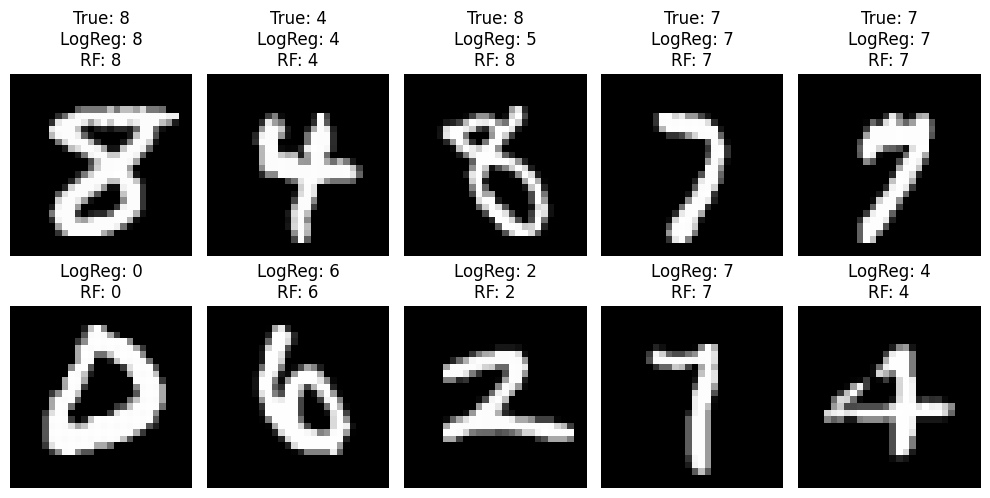

In [10]:
# Step 7: Show Some Predictions

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nLogReg: {y_pred_log[i]}\nRF: {y_pred_rf[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
